### Integration of the planetary system with rebound
To judge the accuracy of the RK45 method I integrated the planetray system also using rebound. In this simulation all the equation are written with respect to the Center of Mass and were converted in the Sun centered RF at the end of the integration.

In [37]:
import rebound
import numpy as np
import matplotlib.pyplot as plt


In [38]:
N = 8
M_sol = 2e30  #Solar mass
G = 6.6743e-11  #G in m^3 s^-2 kg^-1
au = 1.495978707e11 #Au in m
yr = 365.2422*24*3600 #Year in s
# G is now converted in AU^3 yr^-2 Msol^-1
G = G*au**-3*yr**2*M_sol
q = 1e-3  #softening factor
M = 1
m = 1e-4
N_points = int(1e6)

v_circ = lambda r, GM:  (GM/r)**0.5


In [39]:
sim = rebound.Simulation()
sim.G = G
sim.softening = q

sim.add(m=M, x=0, y=0, vx=0, vy=0)
for r in np.linspace(2, 16, N):
  sim.add(m=M*1e-4, x=r, y=0, vx=0, vy=v_circ(r,G*M))
#Move the system to the Center Of Mass RF
sim.move_to_com()


T = np.linspace(0,2e4,N_points)
y = [] 

for t in T:
    sim.integrate(t)
    y_t=[]
    for p in sim.particles:
        y_t.append([p.x, p.y, p.vx, p.vy])
    y.append(y_t)

Y = np.array(y)


In [44]:
y_centered = [Y[:,i+1] - Y[:,0] for i in range(N)]
y = np.array(y_centered)

R = np.array([y[i,:,0:2] for i in range(N)])
V = np.array([y[i,:,2:4] for i in range(N)])


r = np.array([np.linalg.norm(r_i, axis=1) for r_i in R])


K = 0.5*np.sum([m*np.linalg.norm(V[i], axis=1)**2 for i in range(N)], axis=0)

#Potential energy between the masses
U_ij = np.sum([-G*m**2/np.linalg.norm(R[i]-R[j], axis=1) for i in range(N) for j in range(i)], axis=0)

#Potential energy between a mass and the central one
U_central = np.sum([-G*M*m/r[i] for i in range(N)], axis=0)
E = K+U_central+U_ij

L = np.sum([m*np.cross(r_i, v_i, axis=1) for r_i, v_i in zip(R,V)], axis=0)


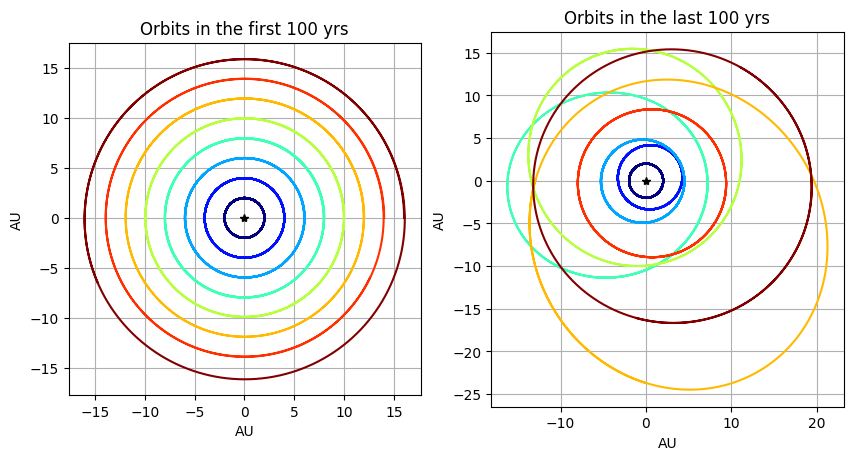

In [48]:
import matplotlib.cm as cm

colors = cm.jet(np.linspace(0,1,N))

fig, AX = plt.subplots(1,2, figsize=(10,5))
AX[0].set_aspect('equal')
AX[0].grid()
AX[0].set_xlabel('AU')
AX[0].set_ylabel('AU')
AX[0].plot(0,0,'k*')
AX[1].set_aspect('equal')
AX[1].grid()
AX[1].set_xlabel('AU')
AX[1].set_ylabel('AU')
AX[1].plot(0,0,'k*')
AX[0].set_title('Orbits in the first 100 yrs')
AX[1].set_title('Orbits in the last 100 yrs')


for R_i,c in zip(R,colors):  
  AX[0].plot(R_i[:5000,0], R_i[:5000,1], color=c)

for R_i,c in zip(R,colors):  
  AX[1].plot(R_i[-5000:,0], R_i[-5000:,1], color=c)


Compared with the prevoius results, the final order of the planets has changed, and this simulation too predicts that some planets may share orbits for a long period of time.

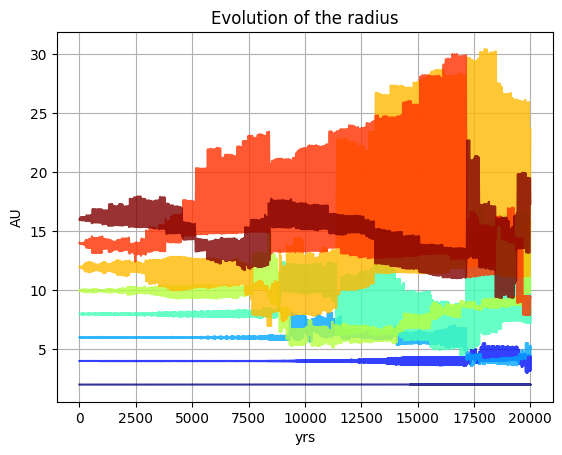

In [46]:
for r_i, c in zip(r, colors):
  plt.plot(T, r_i, alpha =0.8, color=c)
plt.grid()
plt.title('Evolution of the radius')
plt.xlabel('yrs')
plt.ylabel('AU')
plt.show()


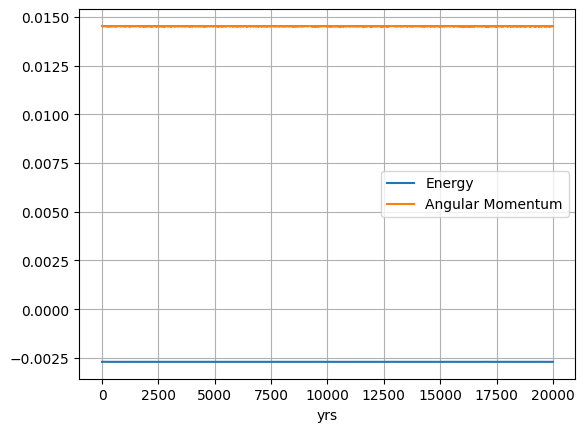

The relative error on the energy is 0.06808560720741319%
The relative error on the angular momentum is -0.09458097866582582%


In [47]:
plt.plot(T, E, label='Energy')
plt.plot(T, L, label='Angular Momentum')
plt.xlabel('yrs')
plt.grid()
plt.legend()
plt.show()

E_err = E[-1]/E[0]-1
L_err = L[-1]/L[0]-1

print(f'The relative error on the energy is {100*E_err}%')
print(f'The relative error on the angular momentum is {100*L_err}%')


Compared to the RK45 integrator, the error on both energy and angular momentum is smaller by more than one order of magnitude.